<a href="https://colab.research.google.com/github/BluePhoenix97/Codigos-Klap/blob/main/Copia_de_FORECAST_MASIVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install statsmodels





In [2]:
from google.colab import files

uploaded = files.upload()


Saving Masivo.xlsx to Masivo.xlsx


***Preprocesamiento***

In [3]:
import pandas as pd

# Assuming the file name is 'ProyeccionI++.xlsx'
data = pd.read_excel('Masivo.xlsx')

# Rename columns to 'ds' for date and 'y' for sales
data.columns = ['Date', 'y']

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Print the first few rows to verify the changes
print(data.head())



                   y
Date                
2022-01-01   6481583
2022-01-02   8558171
2022-01-03  12414162
2022-01-04  12676375
2022-01-05  13201139


***ARIMA***

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Fit ARIMA model
model = ARIMA(data['y'], order=(3, 1, 3))  # Adjust the order as needed
fit_model = model.fit()

# Make predictions for the next 30 days
forecast = fit_model.get_forecast(steps=30)

# Create a DataFrame with the forecast values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

forecast_data = pd.concat([forecast_values, confidence_intervals], axis=1)
forecast_data.columns = ['Forecast', 'Lower Confidence Interval', 'Upper Confidence Interval']

# Display the forecast DataFrame
print(forecast_data)





/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                Forecast  Lower Confidence Interval  Upper Confidence Interval
2024-05-03  5.185443e+07               3.764085e+07               6.606801e+07
2024-05-04  4.333184e+07               2.903641e+07               5.762727e+07
2024-05-05  4.139282e+07               2.707710e+07               5.570854e+07
2024-05-06  4.900379e+07               3.465288e+07               6.335470e+07
2024-05-07  4.743027e+07               3.305203e+07               6.180850e+07
2024-05-08  4.052057e+07               2.612767e+07               5.491347e+07
2024-05-09  4.518310e+07               3.076388e+07               5.960232e+07
2024-05-10  5.000384e+07               3.554944e+07               6.445824e+07
2024-05-11  4.318781e+07               2.871521e+07               5.766041e+07
2024-05-12  4.141800e+07               2.692776e+07               5.590824e+07
2024-05-13  4.902190e+07               3.449707e+07               6.354673e+07
2024-05-14  4.739005e+07               3.283833e+07 

In [5]:
#búsqueda en cuadrícula (grid search) para encontrar los mejores parámetros (p, d, q) para un modelo ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Define a function for grid search
def grid_search(data, p_range, d_range, q_range):
    best_aic = float("inf")
    best_params = None

    for p, d, q in product(p_range, d_range, q_range):
        try:
            model = ARIMA(data['y'], order=(p, d, q))
            fit_model = model.fit()
            aic = fit_model.aic

            if aic < best_aic:
                best_aic = aic
                best_params = (p, d, q)

        except Exception as e:
            continue

    return best_params

# Specify the ranges for p, d, and q
p_range = range(0, 4)
d_range = range(0, 2)
q_range = range(0, 4)

# Perform grid search
best_params = grid_search(data, p_range, d_range, q_range)

print(f"Best ARIMA Parameters: {best_params}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best ARIMA Parameters: (3, 1, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


***Exponential Smoothing***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Numerical Display of Forecast:
                Forecast
2024-05-03  5.103111e+07
2024-05-04  4.631681e+07
2024-05-05  3.242178e+07
2024-05-06  4.794378e+07
2024-05-07  4.600423e+07
2024-05-08  4.404444e+07
2024-05-09  4.908160e+07
2024-05-10  5.118117e+07
2024-05-11  4.646688e+07
2024-05-12  3.257185e+07
2024-05-13  4.809384e+07
2024-05-14  4.615430e+07
2024-05-15  4.419451e+07
2024-05-16  4.923166e+07
2024-05-17  5.133124e+07
2024-05-18  4.661694e+07
2024-05-19  3.272191e+07
2024-05-20  4.824391e+07
2024-05-21  4.630436e+07
2024-05-22  4.434457e+07
2024-05-23  4.938173e+07
2024-05-24  5.148130e+07
2024-05-25  4.676701e+07
2024-05-26  3.287198e+07
2024-05-27  4.839397e+07
2024-05-28  4.645443e+07
2024-05-29  4.449464e+07
2024-05-30  4.953179e+07
2024-05-31  5.163137e+07
2024-06-01  4.691707e+07


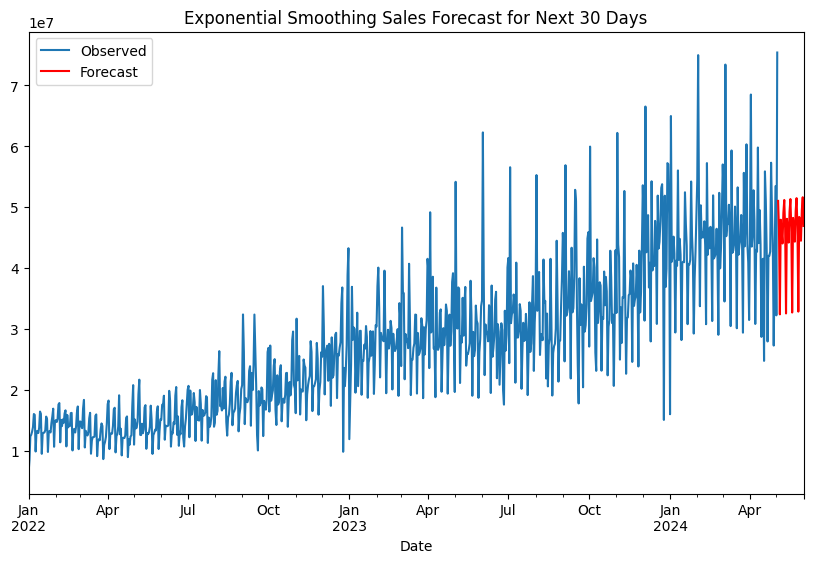

In [6]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Fit Exponential Smoothing model
model = ExponentialSmoothing(data['y'], trend='add', seasonal='add', seasonal_periods=7)
fit_model = model.fit()

# Make predictions for the next 30 days
forecast = fit_model.forecast(steps=30)

# Display the forecast DataFrame
forecast_data = pd.DataFrame({'Forecast': forecast})
forecast_data.index = pd.date_range(data.index[-1], periods=31, freq='D')[1:]  # Adjusted to 31 periods

print("Numerical Display of Forecast:")
print(forecast_data)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
data['y'].plot(ax=ax, label='Observed')
forecast.plot(ax=ax, label='Forecast', color='red')

plt.title('Exponential Smoothing Sales Forecast for Next 30 Days')
plt.legend()
plt.show()



***SARIMA***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Numerical Display of Forecast with Confidence Intervals:
                Forecast      Lower CI      Upper CI
2024-05-03  4.452449e+07  2.837273e+07  6.067625e+07
2024-05-04  4.943369e+07  2.659165e+07  7.227573e+07
2024-05-05  4.470640e+07  1.673073e+07  7.268207e+07
2024-05-06  2.950244e+07 -2.801080e+06  6.180596e+07
2024-05-07  5.481858e+07  1.870215e+07  9.093502e+07
2024-05-08  4.154872e+07  1.985146e+06  8.111229e+07
2024-05-09  4.268157e+07 -5.196506e+04  8.541511e+07
2024-05-10  4.356927e+07 -6.472096e+06  9.361063e+07
2024-05-11  4.891240e+07 -7.497885e+06  1.053227e+08
2024-05-12  4.420556e+07 -1.792417e+07  1.063353e+08
2024-05-13  2.897228e+07 -3.839303e+07  9.633760e+07
2024-05-14  5.343129e+07 -1.879106e+07  1.256536e+08
2024-05-15  4.102763e+07 -3.574509e+07  1.178003e+08
2024-05-16  4.234142e+07 -3.872666e+07  1.234095e+08
2024-05-17  4.316083e+07 -4.652265e+07  1.328443e+08
2024-05-18  4.833564e+07 -4.920523e+07  1.458765e+08
2024-05-19  4.362087e+07 -6.118999e+07  1.

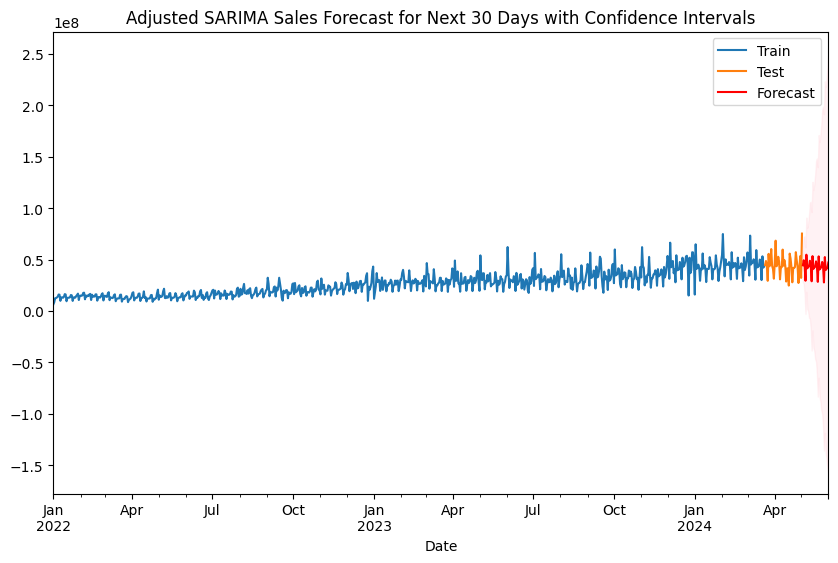

In [7]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split  # Import train_test_split
import matplotlib.pyplot as plt

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.05, shuffle=False)

# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, s)
order = (0, 1, 0)  # Adjust as needed based on model diagnostics
seasonal_order = (1, 1, 0, 7)  # Adjust as needed based on model diagnostics

# Fit the SARIMA model
model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order, initialization='approximate_diffuse')
fit_model = model.fit()

# Make predictions for the next 30 days
forecast_days = 30
forecast = fit_model.get_forecast(steps=forecast_days)
forecast_index = pd.date_range(data.index[-1] + pd.DateOffset(1), periods=forecast_days, freq='D')  # Adjusted the index creation
forecast_values = forecast.predicted_mean.values

# Confidence intervals
conf_int = forecast.conf_int()
conf_int.index = forecast_index  # Set the confidence intervals index to match the forecast index

# Create a DataFrame with the forecast values and confidence intervals
forecast_data = pd.DataFrame({'Forecast': forecast_values, 'Lower CI': conf_int.iloc[:, 0], 'Upper CI': conf_int.iloc[:, 1]})

# Display the forecast DataFrame
print("Numerical Display of Forecast with Confidence Intervals:")
print(forecast_data)

# Plot the forecast with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
train_data['y'].plot(ax=ax, label='Train')
test_data['y'].plot(ax=ax, label='Test')
forecast_data['Forecast'].plot(ax=ax, label='Forecast', color='red')
ax.fill_between(forecast_data.index, forecast_data['Lower CI'], forecast_data['Upper CI'], color='pink', alpha=0.2)

plt.title('Adjusted SARIMA Sales Forecast for Next 30 Days with Confidence Intervals')
plt.legend()
plt.show()




import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, s)
order = (0, 1, 1)  # Adjust as needed based on model diagnostics
seasonal_order = (1, 1, 1, 7)  # Adjust as needed based on model diagnostics

# Fit the SARIMA model
model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order, initialization='approximate_diffuse')
fit_model = model.fit()

# Make predictions for the next 30 days
forecast_days = 30
forecast = fit_model.get_forecast(steps=forecast_days)
forecast_index = pd.date_range(data.index[-1], periods=forecast_days + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean.values

# Create a DataFrame with the forecast values
forecast_data = pd.DataFrame({'Forecast': forecast_values}, index=forecast_index)

# Display the forecast DataFrame
print("Numerical Display of Forecast:")
print(forecast_data)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
train_data['y'].plot(ax=ax, label='Train')
test_data['y'].plot(ax=ax, label='Test')
forecast_data['Forecast'].plot(ax=ax, label='Forecast', color='red')

plt.title('Adjusted SARIMA Sales Forecast for Next 30 Days')
plt.legend()
plt.show()



In [8]:
#Grid search para encontrar los mejores parámetros para un modelo SARIMA

import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Define a range of possible parameter values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]  # Assuming weekly seasonality

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Perform grid search
best_mse = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data['y'], order=param, seasonal_order=param_seasonal)
            fit_model = model.fit()

            # Make predictions on the test set
            forecast = fit_model.get_forecast(steps=len(test_data))
            forecast_values = forecast.predicted_mean.values

            # Calculate Mean Squared Error
            mse = mean_squared_error(test_data['y'], forecast_values)

            # Update best parameters if MSE improves
            if mse < best_mse:
                best_mse = mse
                best_params = (param, param_seasonal)

        except Exception as e:
            continue

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best Parameters: ((0, 0, 0), (0, 1, 1, 7))
Best Mean Squared Error: 63455286882684.14


***Pruebas al modelo Sarima***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


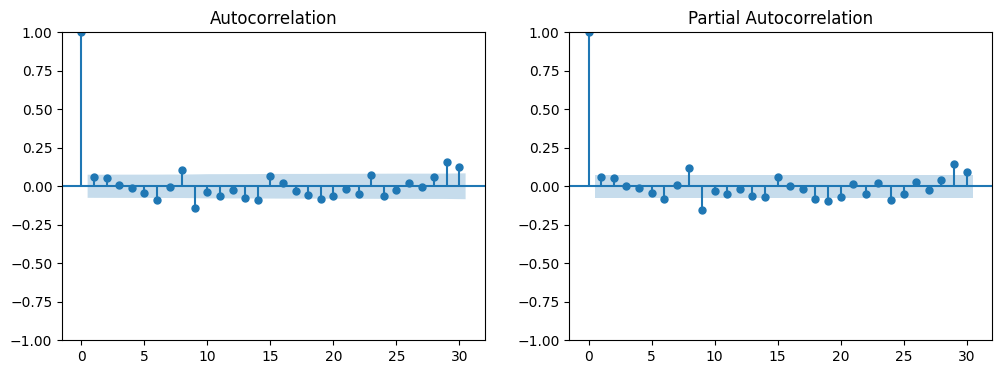

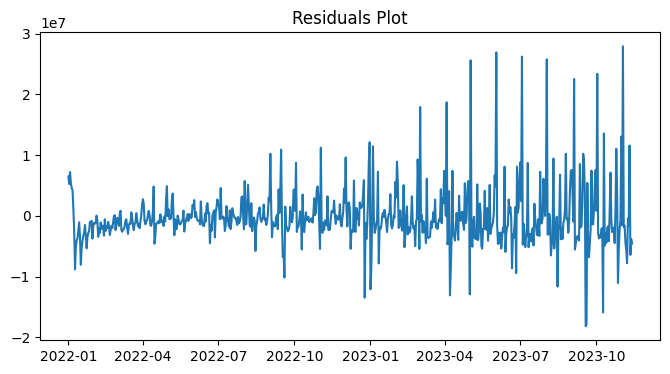

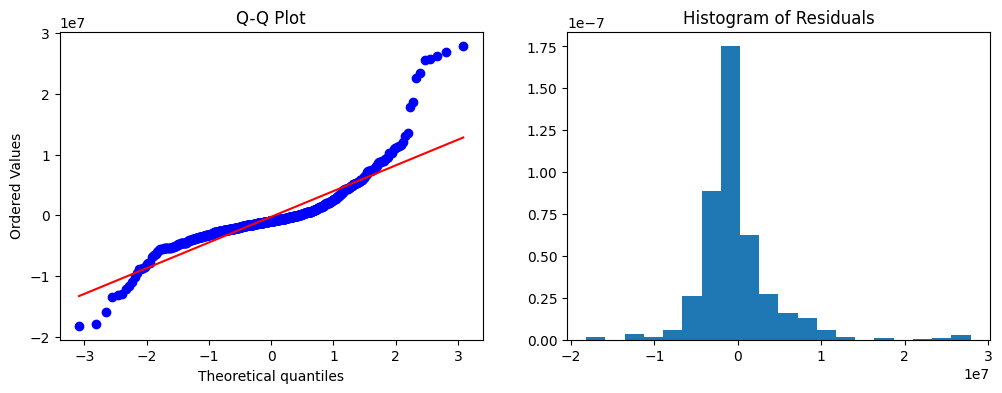

Ljung-Box Test Results:
   Ljung-Box Statistic    P-Value
1              lb_stat  lb_pvalue
2              lb_stat  lb_pvalue
3              lb_stat  lb_pvalue
4              lb_stat  lb_pvalue
5              lb_stat  lb_pvalue
6              lb_stat  lb_pvalue
7              lb_stat  lb_pvalue
8              lb_stat  lb_pvalue
9              lb_stat  lb_pvalue
10             lb_stat  lb_pvalue


In [9]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, s)
order = (0, 1, 1)  # Adjust as needed based on model diagnostics
seasonal_order = (1, 1, 1, 7)  # Adjust as needed based on model diagnostics

# Fit the SARIMA model
model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# Diagnostics
residuals = fit_model.resid

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, lags=30, ax=ax[0])
plot_pacf(residuals, lags=30, ax=ax[1])
plt.show()

# Residuals plot
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.show()

# Histogram and Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
stats.probplot(residuals, dist="norm", plot=ax[0])
ax[0].set_title('Q-Q Plot')
ax[1].hist(residuals, bins=20, density=True)
ax[1].set_title('Histogram of Residuals')
plt.show()

# Ljung-Box test
lags = min(10, len(residuals) - 1)
lb, p_value = acorr_ljungbox(residuals, lags=lags)
print("Ljung-Box Test Results:")
print(pd.DataFrame({'Ljung-Box Statistic': lb, 'P-Value': p_value}, index=range(1, lags + 1)))


***Comparación de modelos de pronóstico***

In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Feature engineering: using the day number as a feature
data['day_number'] = (data.index - data.index.min()).days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Prepare the features and target for training
X_train = train_data[['day_number']]
y_train = train_data['y']

# Prepare the features and target for testing
X_test = test_data[['day_number']]
y_test = test_data['y']

# ARIMA model
model_arima = ARIMA(y_train, order=(2, 1, 3))
fit_model_arima = model_arima.fit()
forecast_arima = fit_model_arima.forecast(steps=len(y_test))

# SARIMAX model
order_sarimax = (1, 1, 1, 7)  # Adjust as needed based on model diagnostics
model_sarimax = SARIMAX(y_train, order=(0, 1, 1), seasonal_order=order_sarimax)
fit_model_sarimax = model_sarimax.fit()
forecast_sarimax = fit_model_sarimax.get_forecast(steps=len(y_test)).predicted_mean

# Exponential Smoothing model
model_exp_smooth = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=7)
fit_model_exp_smooth = model_exp_smooth.fit()
forecast_exp_smooth = fit_model_exp_smooth.forecast(steps=len(y_test))

# Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
forecast_rf = model_rf.predict(X_test)

# Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
forecast_linear = model_linear.predict(X_test)

# Calculate Mean Squared Error, AIC, MAPE, and SMAPE for each model
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    aic = None
    try:
        aic = fit_model_arima.aic
    except:
        pass
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

    return mse, aic, mape, smape

mse_arima, aic_arima, mape_arima, smape_arima = calculate_metrics(y_test, forecast_arima)
mse_sarimax, aic_sarimax, mape_sarimax, smape_sarimax = calculate_metrics(y_test, forecast_sarimax)
mse_exp_smooth, aic_exp_smooth, mape_exp_smooth, smape_exp_smooth = calculate_metrics(y_test, forecast_exp_smooth)
mse_rf, aic_rf, mape_rf, smape_rf = calculate_metrics(y_test, forecast_rf)
mse_linear, aic_linear, mape_linear, smape_linear = calculate_metrics(y_test, forecast_linear)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMAX', 'Exponential Smoothing', 'Random Forest', 'Linear Regression'],
    'Mean Squared Error': [mse_arima, mse_sarimax, mse_exp_smooth, mse_rf, mse_linear],
    'AIC': [aic_arima, aic_sarimax, aic_exp_smooth, None, None],  # AIC not applicable for non-statistical models
    'MAPE': [mape_arima, mape_sarimax, mape_exp_smooth, mape_rf, mape_linear],
    'SMAPE': [smape_arima, smape_sarimax, smape_exp_smooth, smape_rf, smape_linear]
})

print("Comparison of Models:")
print(results)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Comparison of Models:
                   Model  Mean Squared Error           AIC       MAPE  \
0                  ARIMA        8.152223e+13  26120.329306  15.373594   
1                SARIMAX        1.051336e+14  26120.329306  21.852479   
2  Exponential Smoothing        9.115799e+13  26120.329306  19.781613   
3          Random Forest        8.928706e+13           NaN  16.650571   
4      Linear Regression        9.253714e+13           NaN  16.052064   

       SMAPE  
0  14.647871  
1  19.242316  
2  17.646861  
3  15.230132  
4  15.443178  


***Double Exponential Smoothing***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


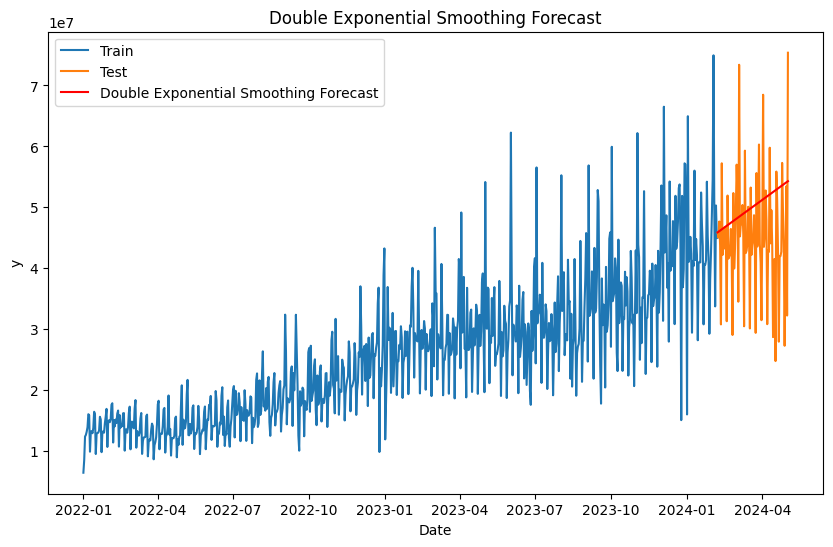

Numerical Display of Forecast:
              Actual      Forecast
Date                              
2024-02-07  45846039  4.589834e+07
2024-02-08  45043438  4.599711e+07
2024-02-09  47679816  4.609588e+07
2024-02-10  43716172  4.619465e+07
2024-02-11  30806687  4.629341e+07
...              ...           ...
2024-04-28  27303366  5.389869e+07
2024-04-29  40962679  5.399746e+07
2024-04-30  53437308  5.409623e+07
2024-05-01  32259845  5.419500e+07
2024-05-02  75364829  5.429377e+07

[86 rows x 2 columns]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Feature engineering: using the day number as a feature
data['day_number'] = (data.index - data.index.min()).days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Prepare the features and target for training
X_train = train_data[['day_number']]
y_train = train_data['y']

# Prepare the features and target for testing
X_test = test_data[['day_number']]
y_test = test_data['y']

# Fit Double Exponential Smoothing model
model_double_exp_smooth = ExponentialSmoothing(y_train, trend='add', seasonal=None)
fit_model_double_exp_smooth = model_double_exp_smooth.fit()

# Make predictions
forecast_double_exp_smooth = fit_model_double_exp_smooth.forecast(steps=len(y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['y'], label='Train')
plt.plot(test_data.index, test_data['y'], label='Test')
plt.plot(test_data.index, forecast_double_exp_smooth, label='Double Exponential Smoothing Forecast', color='red')
plt.title('Double Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

# Display the forecast values
forecast_data = pd.DataFrame({'Actual': test_data['y'], 'Forecast': forecast_double_exp_smooth}, index=test_data.index)
print("Numerical Display of Forecast:")
print(forecast_data)


***Gradient Boosting***

Mean Squared Error: 41061351438330.734


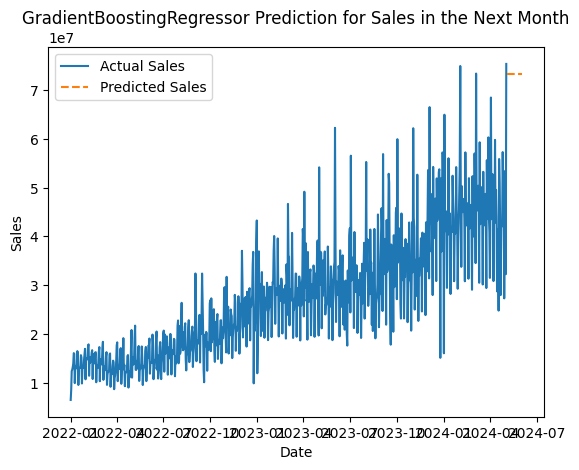

In [12]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your dataset structure is ready with 'Date' as the index and 'y' as the target variable

# Assuming you have additional features, replace 'X' with your actual features
# If you don't have additional features, X would be just the index (dates)
X = data.index.values.reshape(-1, 1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming you want to predict each day in the next month
# Create a DataFrame with the dates of the next month
next_month_dates = pd.date_range(start=data.index.max() + pd.Timedelta(days=1), periods=30, freq='D')

# Create a DataFrame with the index for the next month
next_month_index = next_month_dates.values.reshape(-1, 1)

# Make predictions for the next month
next_month_predictions = model.predict(next_month_index)

# Create a DataFrame with dates and corresponding predictions
predictions_df = pd.DataFrame({'Date': next_month_dates, 'Predicted_Sales': next_month_predictions})

# Plot the predictions
plt.plot(data.index, y, label='Actual Sales')
plt.plot(predictions_df['Date'], predictions_df['Predicted_Sales'], label='Predicted Sales', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('GradientBoostingRegressor Prediction for Sales in the Next Month')
plt.legend()
plt.show()


***Red Neuronal***

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([767])) that is different to the input size (torch.Size([767, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Época [10/100], Pérdida: nan
Época [20/100], Pérdida: nan
Época [30/100], Pérdida: nan
Época [40/100], Pérdida: nan
Época [50/100], Pérdida: nan
Época [60/100], Pérdida: nan
Época [70/100], Pérdida: nan
Época [80/100], Pérdida: nan
Época [90/100], Pérdida: nan
Época [100/100], Pérdida: nan


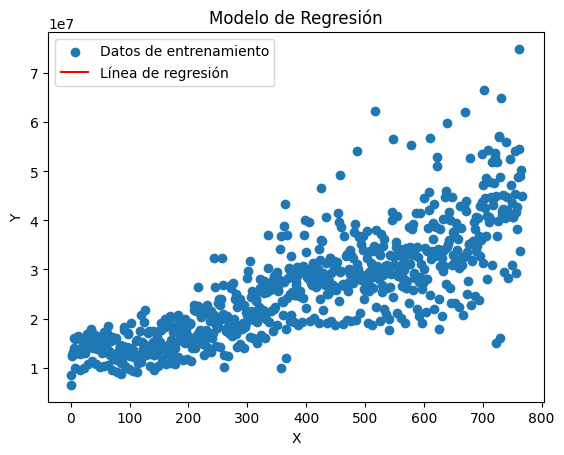

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Feature engineering: using the day number as a feature
data['day_number'] = (data.index - data.index.min()).days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Prepare the features and target for training
x_train = train_data[['day_number']].values  # Convert to numpy array
y_train = train_data['y'].values  # Convert to numpy array

# Convertir los datos en tensores de PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Definir el modelo de red neuronal para regresión
class RedNeuronalRegresion(nn.Module):
    def __init__(self):
        super(RedNeuronalRegresion, self).__init__()
        self.fc = nn.Linear(1, 1)  # Una capa completamente conectada

    def forward(self, x):
        return self.fc(x)

# Instanciar el modelo
modelo = RedNeuronalRegresion()

# Función de pérdida
funcion_costo = nn.MSELoss()

# Optimizador
optimizador = optim.SGD(modelo.parameters(), lr=0.01)

# Entrenamiento del modelo
num_epocas = 100
for epoca in range(num_epocas):
    optimizador.zero_grad()  # Reiniciar gradientes
    y_pred = modelo(x_train_tensor)  # Predicción del modelo
    perdida = funcion_costo(y_pred, y_train_tensor)  # Calcular la pérdida
    perdida.backward()  # Retropropagación
    optimizador.step()  # Actualizar pesos

    if (epoca+1) % 10 == 0:
        print(f'Época [{epoca+1}/{num_epocas}], Pérdida: {perdida.item()}')

# Graficar los datos de entrenamiento y la línea de regresión
plt.scatter(x_train, y_train, label='Datos de entrenamiento')
plt.plot(x_train, modelo(x_train_tensor).detach().numpy(), color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modelo de Regresión')
plt.legend()
plt.show()


***Support Vector Regressor***

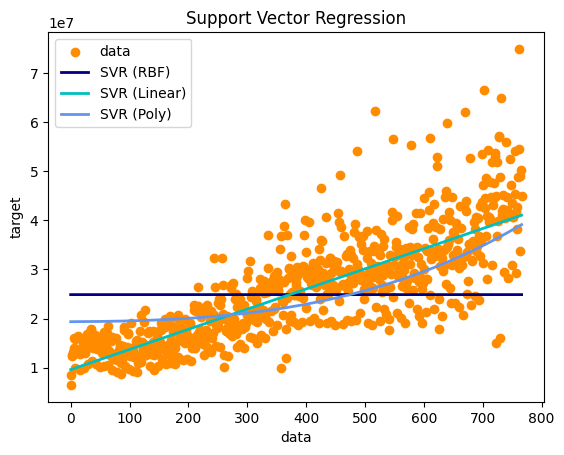

    Prediction_RBF  Prediction_Linear  Prediction_Poly
0     2.488101e+07       4.109763e+07     3.921332e+07
1     2.488092e+07       4.113870e+07     3.928398e+07
2     2.488085e+07       4.117976e+07     3.935481e+07
3     2.488081e+07       4.122083e+07     3.942581e+07
4     2.488079e+07       4.126189e+07     3.949697e+07
5     2.488078e+07       4.130295e+07     3.956830e+07
6     2.488078e+07       4.134402e+07     3.963980e+07
7     2.488078e+07       4.138508e+07     3.971147e+07
8     2.488078e+07       4.142615e+07     3.978331e+07
9     2.488078e+07       4.146721e+07     3.985531e+07
10    2.488078e+07       4.150828e+07     3.992749e+07
11    2.488078e+07       4.154934e+07     3.999983e+07
12    2.488078e+07       4.159041e+07     4.007235e+07
13    2.488078e+07       4.163147e+07     4.014503e+07
14    2.488078e+07       4.167253e+07     4.021788e+07
15    2.488078e+07       4.171360e+07     4.029090e+07
16    2.488078e+07       4.175466e+07     4.036409e+07
17    2.48

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Feature engineering: using the day number as a feature
data['day_number'] = (data.index - data.index.min()).days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

# Prepare the features and target for training
X_train = train_data[['day_number']]
y_train = train_data['y']

# Agregar ruido al objetivo
random_noise = 3 * (0.5 - np.random.rand(len(y_train)))
y_train = y_train + random_noise

# Entrenar el modelo SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1)

# Ajustar los modelos
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)
y_lin = svr_lin.fit(X_train, y_train).predict(X_train)
y_poly = svr_poly.fit(X_train, y_train).predict(X_train)

# Graficar los resultados
lw = 2
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_train, y_rbf, color='navy', lw=lw, label='SVR (RBF)')
plt.plot(X_train, y_lin, color='c', lw=lw, label='SVR (Linear)')
plt.plot(X_train, y_poly, color='cornflowerblue', lw=lw, label='SVR (Poly)')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Preparar los datos de entrada para la predicción de 3 días
X_30days = np.array([[X_train['day_number'].max() + i] for i in range(1, 31)])

# Predecir utilizando los modelos SVR entrenados
y_rbf_30days = svr_rbf.predict(X_30days)
y_lin_30days = svr_lin.predict(X_30days)
y_poly_30days = svr_poly.predict(X_30days)

#print(y_rbf_30days)
#print(y_lin_30days)
#print(y_poly_30days)

#print("Predicción SVR (RBF) a 3 días:", y_rbf_30days)
#print("Predicción SVR (Linear) a 3 días:", y_lin_30days)
#print("Predicción SVR (Poly) a 3 días:", y_poly_30days)

# Crear DataFrames con las predicciones
forecast_data_rbf = pd.DataFrame({'Prediction_RBF': y_rbf_30days})
forecast_data_lin = pd.DataFrame({'Prediction_Linear': y_lin_30days})
forecast_data_poly = pd.DataFrame({'Prediction_Poly': y_poly_30days})

# Concatenar los DataFrames
forecast_data = pd.concat([forecast_data_rbf, forecast_data_lin, forecast_data_poly], axis=1)

print(forecast_data)

forecast_data.to_excel('forecast_predictions.xlsx', index=False)




***Decision tree regressor***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Error cuadrático medio en entrenamiento: 0.0
Error cuadrático medio en test: 696885712341766.6
Coeficiente de determinación en entrenamiento: 1.0
Coeficiente de determinación en test: -6.3648083254744146


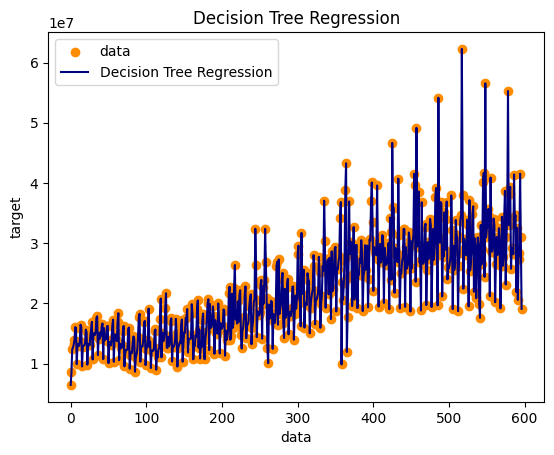

In [23]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Suponiendo que 'Date' es tu índice de fecha y hora
data.index = pd.to_datetime(data.index)

# número de día como característica
data['day_number'] = (data.index - data.index.min()).days

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

# Preparar las características y el objetivo para el entrenamiento
X_train = train_data[['day_number']]
y_train = train_data['y']

# Entrenar el modelo de regresión de árbol de decisión
digit_tree = DecisionTreeRegressor()
digit_tree.fit(X_train, y_train)

# Calcular las métricas en entrenamiento y prueba
y_train_pred = digit_tree.predict(X_train)
y_test_pred = digit_tree.predict(X_test)

print("Error cuadrático medio en entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("Error cuadrático medio en test:", mean_squared_error(y_test, y_test_pred))

print("Coeficiente de determinación en entrenamiento:", r2_score(y_train, y_train_pred))
print("Coeficiente de determinación en test:", r2_score(y_test, y_test_pred))


# Graficar los resultados
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_train, y_train_pred, color='navy', label='Decision Tree Regression')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


Error cuadrático medio en entrenamiento: 0.0
Error cuadrático medio en test: 573260475187700.8
Coeficiente de determinación en entrenamiento: 1.0
Coeficiente de determinación en test: -4.410515020941416


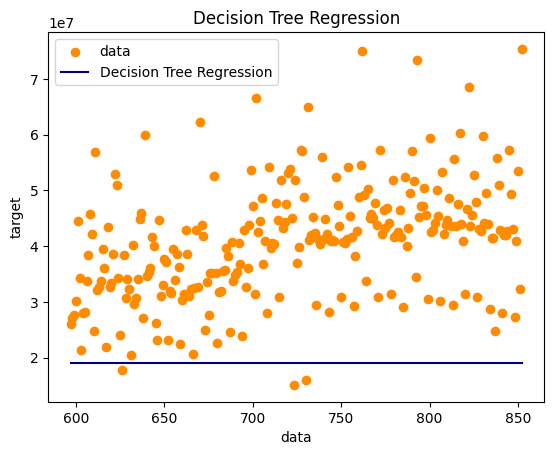

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Suponiendo que 'Date' es tu índice de fecha y hora
data.index = pd.to_datetime(data.index)

# número de día como característica
data['day_number'] = (data.index - data.index.min()).days

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

# Preparar las características y el objetivo para el entrenamiento
X_train = train_data[['day_number']]
y_train = train_data['y']

# Preparar las características y el objetivo para la prueba
X_test = test_data[['day_number']]
y_test = test_data['y']

# Entrenar el modelo de regresión de árbol de decisión
digit_tree = DecisionTreeRegressor()
digit_tree.fit(X_train, y_train)

# Calcular las métricas en entrenamiento y prueba
y_train_pred = digit_tree.predict(X_train)
y_test_pred = digit_tree.predict(X_test)

print("Error cuadrático medio en entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("Error cuadrático medio en test:", mean_squared_error(y_test, y_test_pred))

print("Coeficiente de determinación en entrenamiento:", r2_score(y_train, y_train_pred))
print("Coeficiente de determinación en test:", r2_score(y_test, y_test_pred))


# Graficar los resultados
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, y_test_pred, color='navy', label='Decision Tree Regression')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


***otro decision tree***

Error cuadrático medio en entrenamiento: 0.0
Error cuadrático medio en test: 234656274558339.1
Coeficiente de determinación en entrenamiento: 1.0
Coeficiente de determinación en test: -1.479887955637298


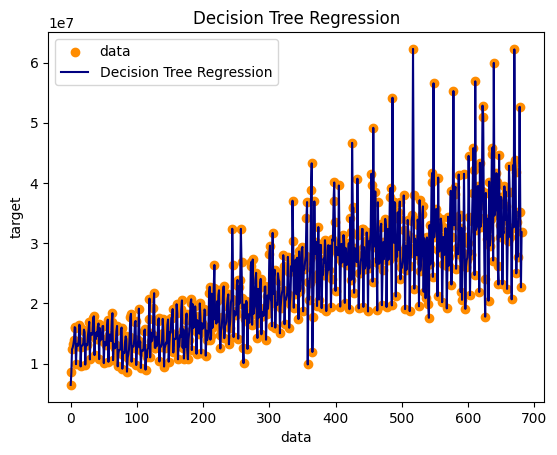

In [21]:
# Métricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'Date' is your datetime index
data.index = pd.to_datetime(data.index)

# Feature engineering: using the day number as a feature
data['day_number'] = (data.index - data.index.min()).days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the features and target for training
X_train = train_data[['day_number']].values  # Convert to numpy array
y_train = train_data['y'].values  # Convert to numpy array

X_test = test_data[['day_number']].values
y_test = test_data['y'].values

# Entrenar el modelo de regresión de árbol de decisión
digit_tree = DecisionTreeRegressor()
digit_tree.fit(X_train, y_train)

# Calcular las métricas en entrenamiento y prueba
y_train_pred = digit_tree.predict(X_train)
y_test_pred = digit_tree.predict(X_test)

print("Error cuadrático medio en entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("Error cuadrático medio en test:", mean_squared_error(y_test, y_test_pred))

print("Coeficiente de determinación en entrenamiento:", r2_score(y_train, y_train_pred))
print("Coeficiente de determinación en test:", r2_score(y_test, y_test_pred))

# Graficar los resultados
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_train, y_train_pred, color='navy', label='Decision Tree Regression')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


BLA BLA BLA BLA


AEIJDHQWIUOEFBQWIURFBQUIWREFBQRRQE